In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [4]:
data = pd.read_excel('side_effect_data 1.xlsx')
df = data.copy()  # veriyi kopyalamak için
df.head(5)


,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [5]:
# Eksik verilerin sayısını tespit etme
missing_data = data.isnull().sum()

# Eksik verilerin sayısını görüntüleme
print(missing_data)

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


In [6]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


In [7]:
# Her bir sütundaki benzersiz (unique) değer sayısını bulma
unique_values = data.nunique()

# Sonuçları görüntüleme
print(unique_values)

Kullanici_id                        196
Cinsiyet                              2
Dogum_Tarihi                        195
Uyruk                                 1
Il                                   13
Ilac_Adi                            151
Ilac_Baslangic_Tarihi                14
Ilac_Bitis_Tarihi                    18
Yan_Etki                             22
Yan_Etki_Bildirim_Tarihi             32
Alerjilerim                          28
Kronik Hastaliklarim                 80
Baba Kronik Hastaliklari             92
Anne Kronik Hastaliklari             84
Kiz Kardes Kronik Hastaliklari       85
Erkek Kardes Kronik Hastaliklari     90
Kan Grubu                             8
Kilo                                 56
Boy                                  41
dtype: int64


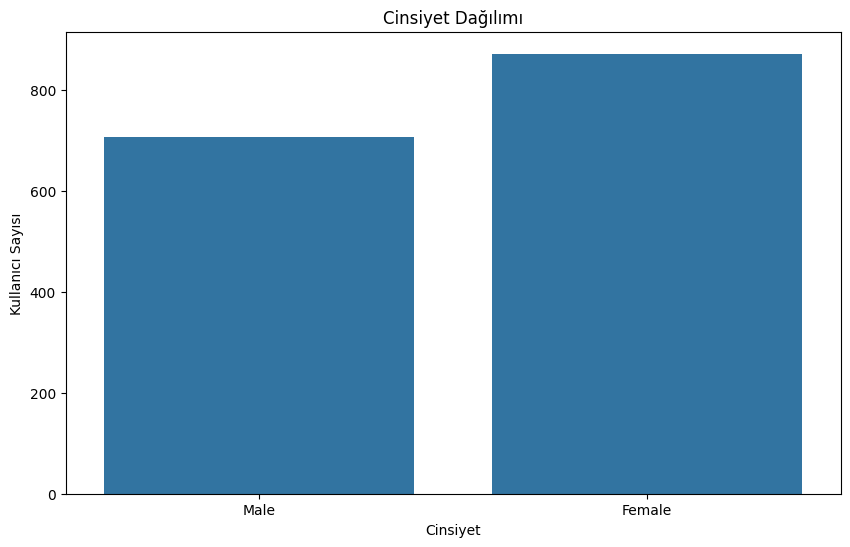

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.countplot(x='Cinsiyet', data=data)

# Etiketler ve başlık
plt.title("Cinsiyet Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Kullanıcı Sayısı")

# Grafiği gösterme
plt.show()

<ipython-input-9-70e730c8c595>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=chronic_diseases,


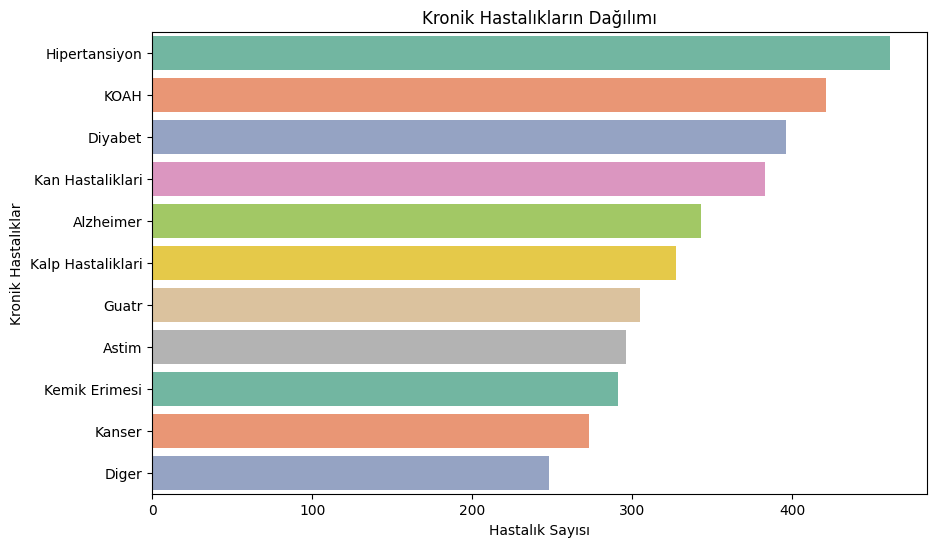

In [9]:

plt.figure(figsize=(10, 6))
chronic_diseases = data['Kronik Hastaliklarim'].dropna().str.split(', ').explode()


sns.countplot(y=chronic_diseases,
              order=chronic_diseases.value_counts().index,
              palette='Set2')  # Set2, kronik hastalıkları farklı renklerde gösterecek

# Etiketler ve başlık
plt.title("Kronik Hastalıkların Dağılımı")
plt.xlabel("Hastalık Sayısı")
plt.ylabel("Kronik Hastalıklar")

# Grafiği gösterme
plt.show()

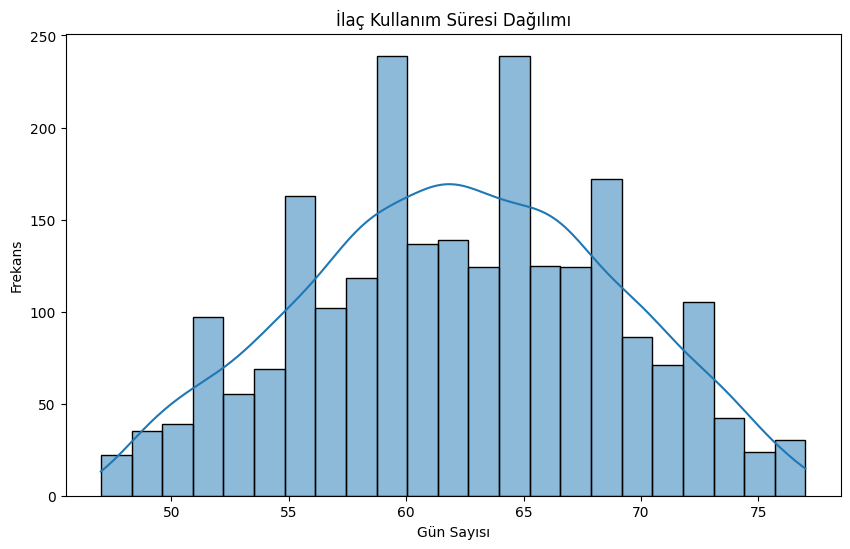

In [10]:
# Tarihleri datetime formatına çevirme
data['Ilac_Baslangic_Tarihi'] = pd.to_datetime(data['Ilac_Baslangic_Tarihi'])
data['Ilac_Bitis_Tarihi'] = pd.to_datetime(data['Ilac_Bitis_Tarihi'])

# İlaç kullanım süresini gün cinsinden hesaplama
data['Ilac_Kullanim_Suresi'] = (data['Ilac_Bitis_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days

# Kullanım süresi dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data['Ilac_Kullanim_Suresi'].dropna(), kde=True)

# Etiketler ve başlık
plt.title("İlaç Kullanım Süresi Dağılımı")
plt.xlabel("Gün Sayısı")
plt.ylabel("Frekans")

# Grafiği gösterme
plt.show()

<ipython-input-11-b6335b8ba3d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=allergies, order=allergies.value_counts().index, palette='Set2')


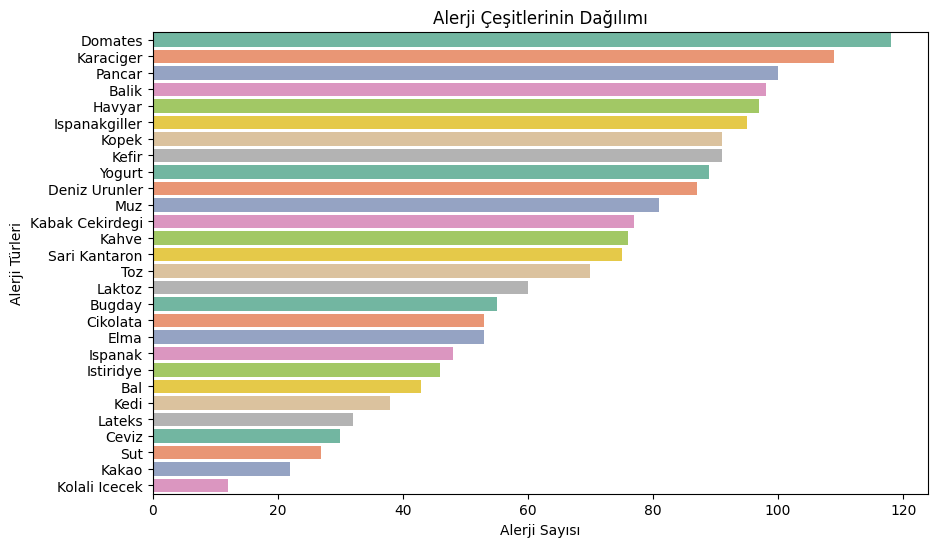

In [11]:
# Grafiği oluşturmak için Seaborn ve Matplotlib kullanımı
plt.figure(figsize=(10, 6))

# "Alerjilerim" sütunundaki verileri split edip patlatarak (explode) her bir alerjiyi ayrı ayrı ele alıyoruz
allergies = data['Alerjilerim'].dropna().str.split(', ').explode()

# Alerjilerin dağılımını farklı renklerle göstermek için renk paleti uyguluyoruz
sns.countplot(y=allergies, order=allergies.value_counts().index, palette='Set2')

# Etiketler ve başlık ekleme
plt.title("Alerji Çeşitlerinin Dağılımı")
plt.xlabel("Alerji Sayısı")
plt.ylabel("Alerji Türleri")

# Grafiği gösterme
plt.show()

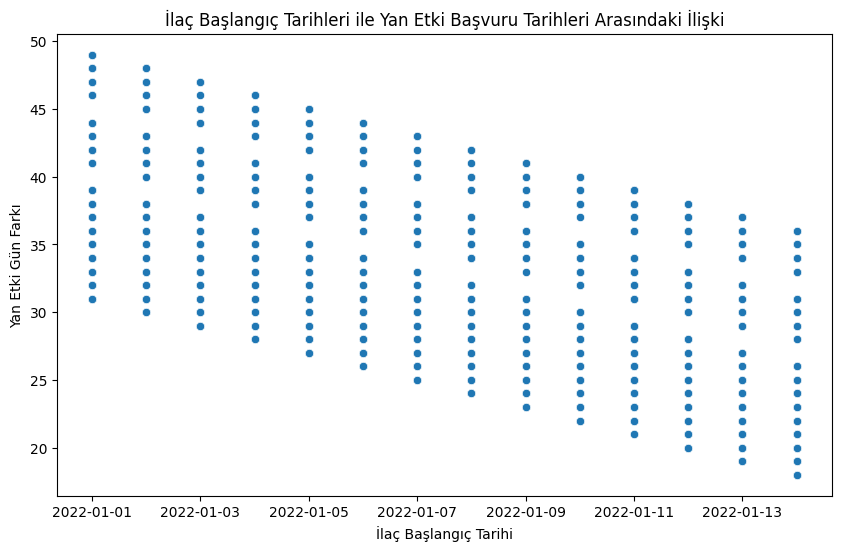

In [12]:
# Tarih sütunlarını datetime formatına çeviriyoruz
data['Ilac_Baslangic_Tarihi'] = pd.to_datetime(data['Ilac_Baslangic_Tarihi'])
data['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(data['Yan_Etki_Bildirim_Tarihi'])

# İlaç başlangıç tarihi ile yan etki bildirim tarihi arasındaki farkı hesaplıyoruz
data['Yan_Etki_Gun_Farki'] = (data['Yan_Etki_Bildirim_Tarihi'] - data['Ilac_Baslangic_Tarihi']).dt.days

# Dağılım grafiğini çiziyoruz
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ilac_Baslangic_Tarihi', y='Yan_Etki_Gun_Farki', data=data)

# Etiketler ve başlık
plt.title("İlaç Başlangıç Tarihleri ile Yan Etki Başvuru Tarihleri Arasındaki İlişki")
plt.xlabel("İlaç Başlangıç Tarihi")
plt.ylabel("Yan Etki Gün Farkı")

# Grafiği gösterme
plt.show()

<ipython-input-13-06fd9905c2d2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(aynı_sayilar.keys()), y=list(aynı_sayilar.values()), palette='Set2')


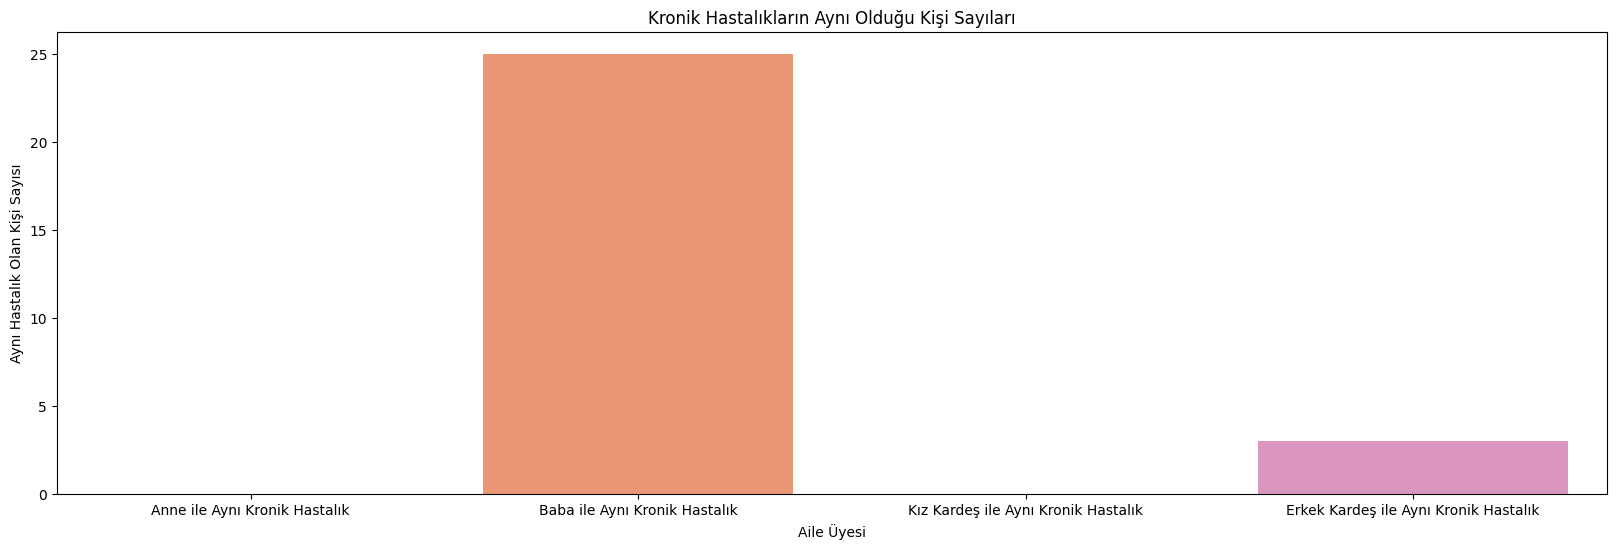

In [13]:
# Öncelikle veri setindeki kronik hastalık verilerini karşılaştırabilmek için normalize ediyoruz (boşlukları temizliyoruz)
data['Kronik Hastaliklarim'] = data['Kronik Hastaliklarim'].dropna().str.lower().str.replace(' ', '')
data['Anne Kronik Hastaliklari'] = data['Anne Kronik Hastaliklari'].dropna().str.lower().str.replace(' ', '')
data['Baba Kronik Hastaliklari'] = data['Baba Kronik Hastaliklari'].dropna().str.lower().str.replace(' ', '')
data['Kiz Kardes Kronik Hastaliklari'] = data['Kiz Kardes Kronik Hastaliklari'].dropna().str.lower().str.replace(' ', '')
data['Erkek Kardes Kronik Hastaliklari'] = data['Erkek Kardes Kronik Hastaliklari'].dropna().str.lower().str.replace(' ', '')

# Her bir grup için aynı olan kronik hastalıkları bulma
anne_aynı = data['Kronik Hastaliklarim'] == data['Anne Kronik Hastaliklari']
baba_aynı = data['Kronik Hastaliklarim'] == data['Baba Kronik Hastaliklari']
kiz_kardes_aynı = data['Kronik Hastaliklarim'] == data['Kiz Kardes Kronik Hastaliklari']
erkek_kardes_aynı = data['Kronik Hastaliklarim'] == data['Erkek Kardes Kronik Hastaliklari']

# Aynı olan kişi sayısını bulma
anne_aynı_sayısı = anne_aynı.sum()
baba_aynı_sayısı = baba_aynı.sum()
kiz_kardes_aynı_sayısı = kiz_kardes_aynı.sum()
erkek_kardes_aynı_sayısı = erkek_kardes_aynı.sum()

# Sonuçları sözlük olarak kaydedip grafiğe döküyoruz
aynı_sayilar = {
    'Anne ile Aynı Kronik Hastalık': anne_aynı_sayısı,
    'Baba ile Aynı Kronik Hastalık': baba_aynı_sayısı,
    'Kız Kardeş ile Aynı Kronik Hastalık': kiz_kardes_aynı_sayısı,
    'Erkek Kardeş ile Aynı Kronik Hastalık': erkek_kardes_aynı_sayısı
}

# Bar grafiği ile görselleştirme
plt.figure(figsize=(20, 6))
sns.barplot(x=list(aynı_sayilar.keys()), y=list(aynı_sayilar.values()), palette='Set2')

# Etiketler ve başlık
plt.title("Kronik Hastalıkların Aynı Olduğu Kişi Sayıları")
plt.xlabel("Aile Üyesi")
plt.ylabel("Aynı Hastalık Olan Kişi Sayısı")

# Grafiği gösterme
plt.show()

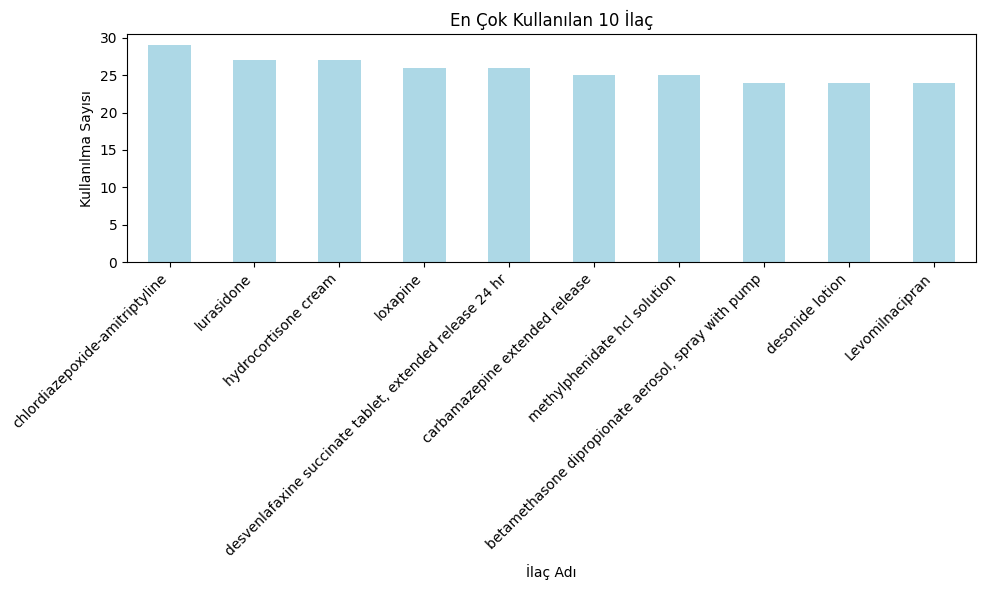

In [19]:
# İlaç adlarının frekanslarını hesaplama
drug_counts = data['Ilac_Adi'].value_counts()

# En çok kullanılan 10 ilacı çubuk grafikte gösterme
plt.figure(figsize=(10, 6))
drug_counts.head(10).plot(kind='bar', color='lightblue')
plt.title('En Çok Kullanılan 10 İlaç')
plt.xlabel('İlaç Adı')
plt.ylabel('Kullanılma Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Grafiği gösterme
plt.show()

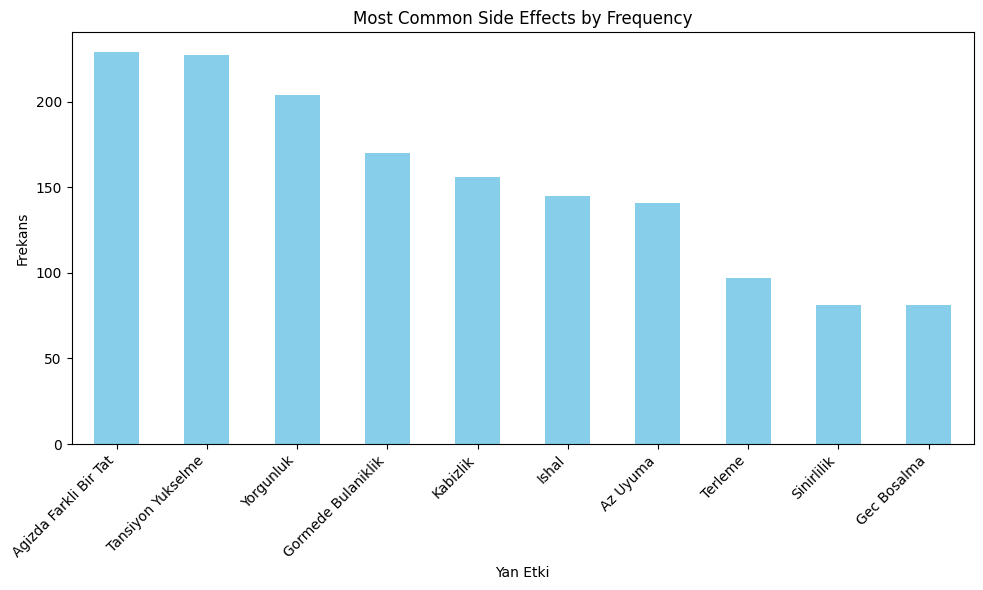

In [14]:
# Yan etki sütunundaki yan etkilerin frekanslarını hesaplama
side_effect_counts = data['Yan_Etki'].value_counts()

# En yaygın 10 yan etkiyi çubuk grafikte gösterme
plt.figure(figsize=(10, 6))
side_effect_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Most Common Side Effects by Frequency')
plt.xlabel('Yan Etki')
plt.ylabel('Frekans')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

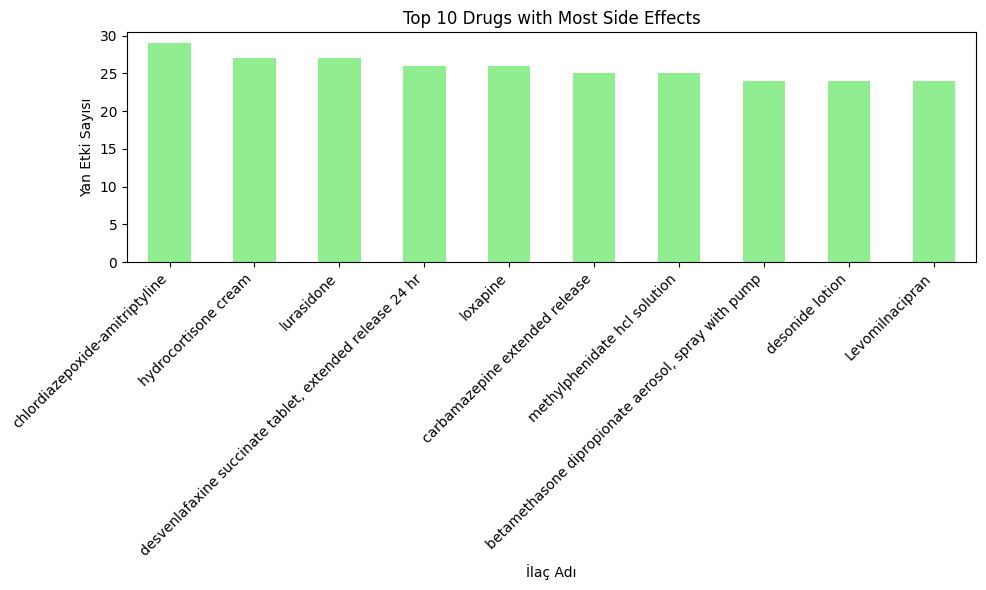

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını yükleme
file_path = 'data.xlsx'


# Her bir ilacın sahip olduğu yan etkileri gruplandırarak sayısını hesaplama
drug_side_effect_counts = df.groupby('Ilac_Adi')['Yan_Etki'].count()

# En yaygın yan etkiye sahip 10 ilacı çubuk grafikte gösterme
plt.figure(figsize=(10, 6))
drug_side_effect_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Drugs with Most Side Effects')
plt.xlabel('İlaç Adı')
plt.ylabel('Yan Etki Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Grafiği gösterme
plt.show()


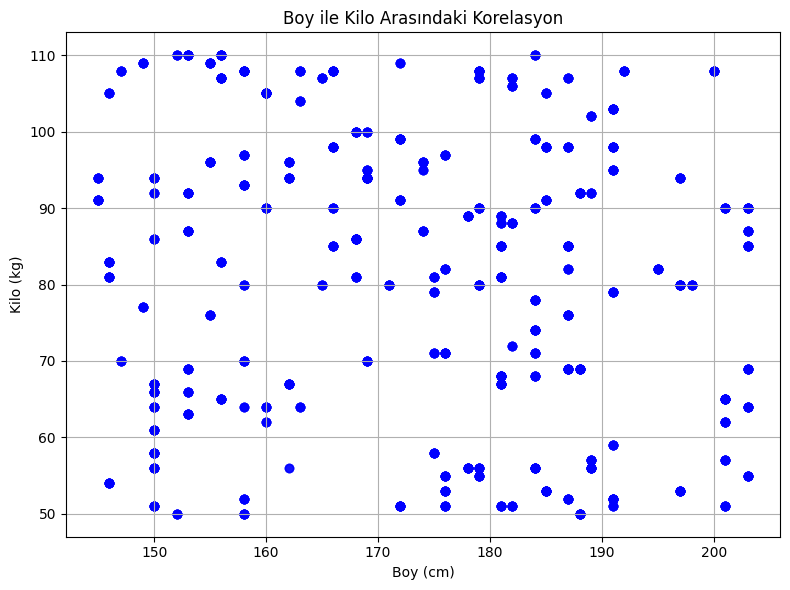

In [18]:




# Boy ve Kilo sütunlarında eksik verileri kaldırma
df_clean = df[['Boy', 'Kilo']].dropna()

# Scatter plot (dağılım grafiği) ile boy-kilo ilişkisini gösterme
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Boy'], df_clean['Kilo'], color='blue', alpha=0.6)

# Grafik başlık ve etiketlerini ayarlama
plt.title('Boy ile Kilo Arasındaki Korelasyon')
plt.xlabel('Boy (cm)')
plt.ylabel('Kilo (kg)')
plt.grid(True)
plt.tight_layout()

# Grafiği gösterme
plt.show()
